<a href="https://colab.research.google.com/github/swansonk14/chemprop/blob/broad/broad/Broad_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
# Mount google drive to access (make sure to sign in using chemprop.broad account)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Imports
import os
from typing import List, Union

import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Figure, Layout, Scatter

In [0]:
# Install rdkit
def install_rdkit():
    try:
        import rdkit
    except ModuleNotFoundError:
        print('Installing rdkit...')
        !wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
        !chmod +x Miniconda3-latest-Linux-x86_64.sh
        !bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
        !conda install -q -y --prefix /usr/local -c rdkit rdkit scikit-learn

        import sys
        sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [0]:
# Converts a SMILES to a PIL image
def smiles_to_image(smiles: str):
    from rdkit.Chem import MolFromSmiles
    from rdkit.Chem.Draw import MolToImage
    
    return MolToImage(MolFromSmiles(smiles))

In [0]:
# Configure plotly in a cell
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
red_colorscale = [[0.0, 'rgb(102,0,0)'], [2/3, 'rgb(255,0,0)'], [1.0, 'rgb(255,204,204)']]
blue_colorscale = [[0.0, 'rgb(0,0,102)'], [2/3, 'rgb(0,0,255)'], [1.0, 'rgb(204,204,255)']]


# Build scatterplot
def scatter(data_name: str, colorscale: List[List[Union[float, str]]]) -> Scatter:
    with open(f'/content/gdrive/My Drive/t-SNE/data/{data_name}') as f:
        data = pd.read_csv(f)
        
    scatter = Scatter(
        x = data['x'],
        y = data['y'],
        mode = 'markers',
        marker = dict(
            color=data['color'],
            colorscale=colorscale
        ),
        text = [f'value: {value:.4f}\nsmiles: {smiles}' for value, smiles in zip(data['value'], data['smiles'])]
    )
        
    return scatter

  
# Display t-SNE
def tsne(data_name_1: str, data_name_2: str = None):
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)
    
    data = [scatter(data_name_1, red_colorscale)]
    
    if data_name_2 is not None:
      data.append(scatter(data_name_2, blue_colorscale))

    layout = Layout(
        hovermode = 'closest',
        xaxis = dict(
            autorange=True,
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            showticklabels=False
        ),
        yaxis = dict(
            autorange=True,
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            showticklabels=False
        )
    )
    
    fig = Figure(data=data, layout=layout)
    
    iplot(fig)

# Displaying available files

In [7]:
print('Available t-SNE data files\n')
for name in os.listdir('/content/gdrive/My Drive/t-SNE/data/'):
  print(name)

Available t-SNE data files

10k_inhibition_smiles_p30.csv
2600_inhibition_smiles_p500.csv
2600_bicarbinhibition_smiles_p30.csv
10k_bicarbinhibition_smiles_p5.csv
2600_bicarbinhibition_smiles_p5.csv
10k_bicarbinhibition_smiles_p50.csv
10k_bicarbinhibition_smiles_p30.csv
10k_inhibition_smiles_p50.csv
2600_bicarbinhibition_smiles_p50.csv
10k_bicarbinhibition_smiles_p100.csv
2600_inhibition_smiles_p100.csv
2600_bicarbinhibition_smiles_p2.csv
2600_inhibition_smiles_p5.csv
2600_inhibition_smiles_p50.csv
2600_inhibition_smiles_p2.csv
2600_bicarbinhibition_smiles_p500.csv
10k_inhibition_smiles_p5.csv
10k_bicarbinhibition_smiles_p500.csv
10k_inhibition_smiles_p2.csv
10k_bicarbinhibition_smiles_p2.csv
2600_inhibition_smiles_p30.csv
2600_bicarbinhibition_smiles_p100.csv
10k_inhibition_smiles_p100.csv
10k_inhibition_smiles_p500.csv


# t-SNE

In [8]:
# Replace the two files names below with any of the files listed above
tsne('2600_inhibition_smiles_p30.csv', '10k_inhibition_smiles_p30.csv')

# Draw molecules

In [10]:
# Import/install rdkit
# install_rdkit()

Installing rdkit...
--2019-02-08 03:59:10--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
reinstalling: python-3.7.1-h0371630_7 ...
Python 3.7.1
reinstalling: ca-certificates-2018.03.07-0 ...
reinstalling: conda-env-2.6.0-1 ...
reinstalling: libgcc-ng-8.2.0-hdf63c60_1 ...
reinstalling: libstdcxx-ng-8.2.0-hdf63c60_1 ...
reinstalling: libffi-3.2.1-hd88cf55_4 ...
reinstalling: ncurses-6.1-he6710b0_1 ...
reinstalling: openssl-1.1.1a-h7b6447c_0 ...
reinstalling: xz-5.2.4-h14c3975_4 ...
reinstalling: yaml-0.1.7-had09818_2 ...
reinstalling: zlib-1.2.11-h7b6447c_3 ...
reinstalling: libedit-3.1.20170329-h6b74fdf_2 ...
reinstalling: rea

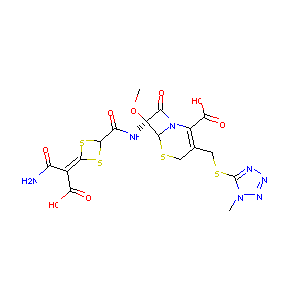

In [11]:
# Convert SMILES to image
# smiles_to_image('CCC')